11501568/11490434 [==============================] - 0s 0us/step
X_train: (40200, 784)
Y_train: (40200,)
X_val: (19800, 784)
Y_val: (19800,)
X_test:  (10000, 784)
Y_test:  (10000,)
8


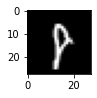

6


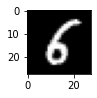

9


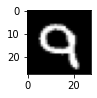

6


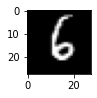

3


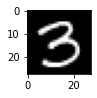

0


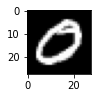

0


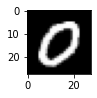

5


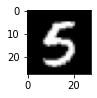

7


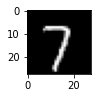

In [ ]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Flatten to 1 vector
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# Train Test Split
train_X, val_X, train_y, val_y = train_test_split(x_train, y_train, test_size = 0.33, random_state = 42)

# Examples
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_val: ' + str(val_X.shape))
print('Y_val: ' + str(val_y.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

for i in range(9):  
    plt.subplot(330 + 1 + i)
    print(train_y[i])
    plt.imshow(train_X[i].reshape(28, 28), cmap = plt.get_cmap('gray'))
    plt.show()

# Latent Dimension = 2

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_img (InputLayer)      [(None, 784)]             0         
                                                                 
 encoder (Functional)        (None, 2)                 244902    
                                                                 
 decoder (Functional)        (None, 784)               245684    
                                                                 
Total params: 490,586
Trainable params: 490,586
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
154/158 [============================>.] - ETA: 0s - loss: 0.1813
Epoch 00001: val_loss improved from inf to 0.12670, saving model to best_model.h5
158/158 [==============================] - 3s 14ms/step - loss: 0.1802 - val_loss: 0.1267
Epoch 2/200
156/158 [============================>.] - ETA: 0s 

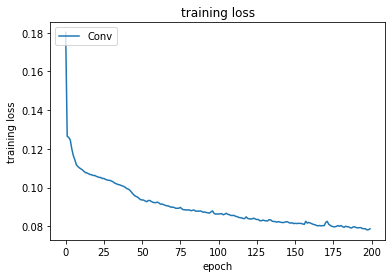

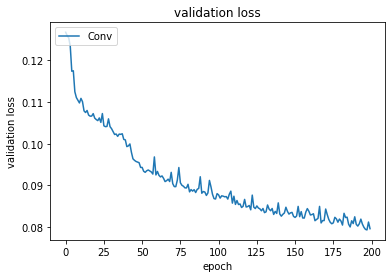

In [ ]:
import keras
from keras import layers
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint, EarlyStopping


latent_dim = 2

# Create encoder
input_img = keras.Input(shape=(784,), name="input_img")
x = layers.Dense(256, activation='relu')(input_img)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(8, activation='relu')(x)
x = layers.Dense(4, activation='relu')(x)
encoded  = layers.Dense(latent_dim, activation='relu')(x)
encoder = keras.Model(input_img, encoded, name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='latent_input')
x = layers.Dense(4, activation='relu')(latent_inputs)
x = layers.Dense(8, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
decoded = layers.Dense(784, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, decoded, name='decoder')

# antoencoder model
net = decoder(encoder(input_img))
autoencoder = keras.Model(input_img, net, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')
autoencoder.summary()

best_model = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='auto', save_best_only=True, verbose=1)

history = autoencoder.fit(train_X, train_X,
                          epochs=200,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(val_X, val_X),
                          callbacks=[best_model])

# Plot training accuracy
plt.plot(history.history['loss'])
plt.title('training loss')
plt.ylabel('training loss')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

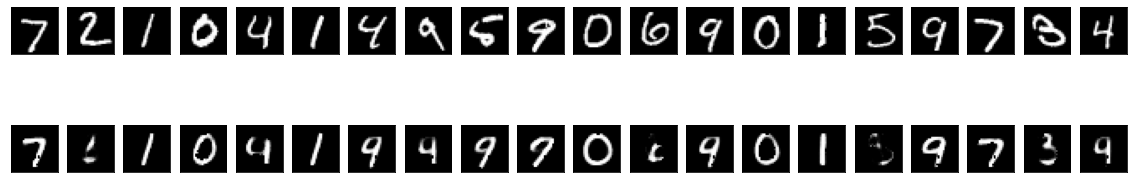

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)
n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

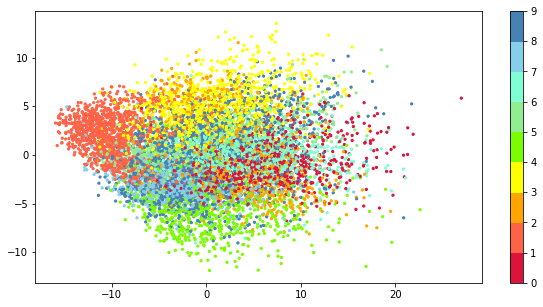

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

colours = ListedColormap(["crimson", "tomato", "orange", "yellow", "lawngreen", "lightgreen", "aquamarine", "skyblue", "steelblue"])

x_test_encoded = encoder.predict(x_test, batch_size=256)

principalComponents = pca.fit_transform(x_test_encoded)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

plt.figure(figsize=(10, 5))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=y_test, cmap=colours, s=5)
plt.colorbar()
plt.show()

# Latent Dimension = 16

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_img (InputLayer)      [(None, 784)]             0         
                                                                 
 encoder (Functional)        (None, 16)                244720    
                                                                 
 decoder (Functional)        (None, 784)               245488    
                                                                 
Total params: 490,208
Trainable params: 490,208
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
156/158 [============================>.] - ETA: 0s - loss: 0.1558
Epoch 00001: val_loss improved from inf to 0.12849, saving model to best_model.h5
158/158 [==============================] - 3s 13ms/step - loss: 0.1556 - val_loss: 0.1285
Epoch 2/200
156/158 [============================>.] - ETA: 0s 

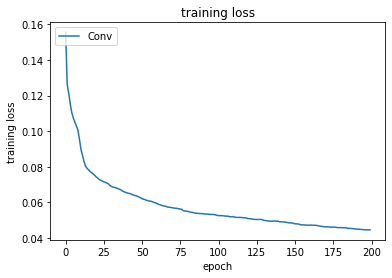

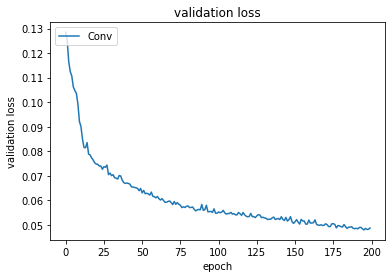

In [ ]:
latent_dim = 16

# Create encoder
input_img = keras.Input(shape=(784,), name="input_img")
x = layers.Dense(256, activation='relu')(input_img)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
encoded  = layers.Dense(latent_dim, activation='relu')(x)
encoder = keras.Model(input_img, encoded, name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='latent_input')
x = layers.Dense(32, activation='relu')(latent_inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
decoded = layers.Dense(784, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, decoded, name='decoder')

# antoencoder model
net = decoder(encoder(input_img))
autoencoder = keras.Model(input_img, net, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')
autoencoder.summary()

best_model = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='auto', save_best_only=True, verbose=1)

history = autoencoder.fit(train_X, train_X,
                          epochs=200,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(val_X, val_X),
                          callbacks=[best_model])

# Plot training accuracy
plt.plot(history.history['loss'])
plt.title('training loss')
plt.ylabel('training loss')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

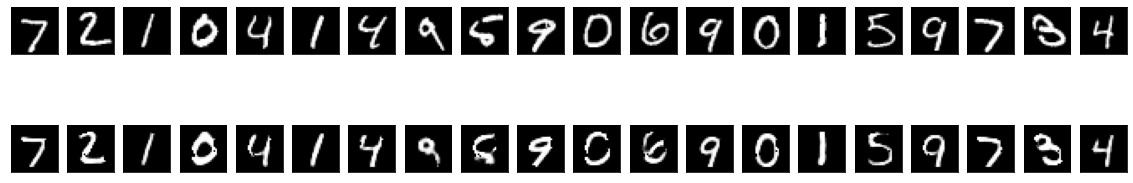

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)
n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

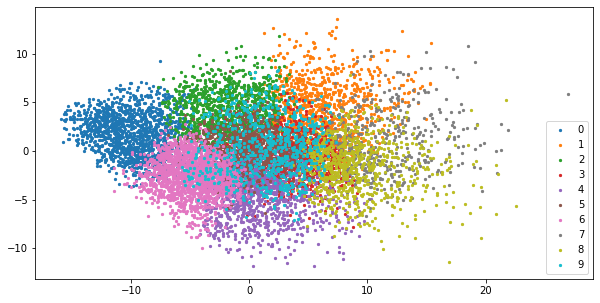

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


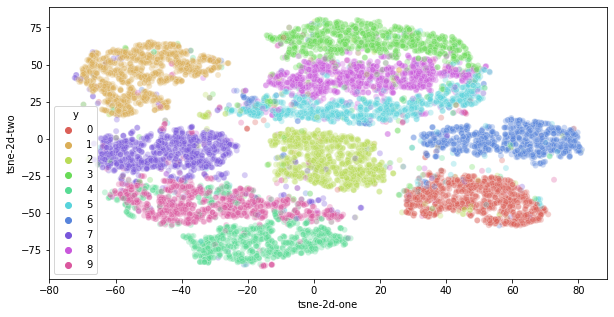

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
import kmeans_pytorch 
import seaborn as sns
import pandas as pd

pca = PCA(n_components=2)

x_train_encoded = encoder.predict(x_train, batch_size=256)
x_test_encoded = encoder.predict(x_test, batch_size=256)

kmeans = KMeans(n_clusters=10, random_state=42).fit(x_train_encoded)
y_pred = kmeans.predict(x_test_encoded)

principalComponents = pca.fit_transform(x_test_encoded)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['label'] = y_pred

plt.figure(figsize=(10, 5))
for i in range(10):
  tmp = principalDf[principalDf['label'] == i]
  plt.scatter(tmp['principal component 1'], tmp['principal component 2'], label = i, s = 5)
plt.legend()
plt.show()

#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, cluster_ids_x.numpy()))

df = pd.DataFrame(x_test_encoded)
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(df)

dt_sub = pd.DataFrame(zip(tsne_results[:,0], tsne_results[:,1], y_test), 
                      columns=["tsne-2d-one", "tsne-2d-two", "y"]) 
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=dt_sub,
    legend="full",
    alpha=0.3
)

# Latent Dimension = 256


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_img (InputLayer)      [(None, 784)]             0         
                                                                 
 encoder (Functional)        (None, 256)               200960    
                                                                 
 decoder (Functional)        (None, 784)               201488    
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
157/158 [============================>.] - ETA: 0s - loss: 0.1278
Epoch 00001: val_loss improved from inf to 0.09095, saving model to best_model.h5
158/158 [==============================] - 2s 10ms/step - loss: 0.1278 - val_loss: 0.0910
Epoch 2/200
155/158 [============================>.] - ETA: 0s 

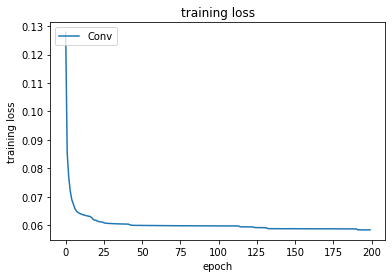

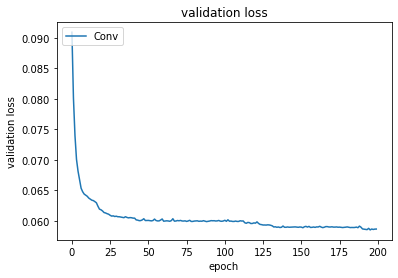

In [ ]:
latent_dim = 256

# Create encoder
input_img = keras.Input(shape=(784,), name="input_img")
encoded = layers.Dense(latent_dim, activation='relu')(input_img)
encoder = keras.Model(input_img, encoded, name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='latent_input')
decoded = layers.Dense(784, activation='sigmoid')(latent_inputs)
decoder = keras.Model(latent_inputs, decoded, name='decoder')

# antoencoder model
net = decoder(encoder(input_img))
autoencoder = keras.Model(input_img, net, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')
autoencoder.summary()

best_model = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='auto', save_best_only=True, verbose=1)

history = autoencoder.fit(train_X, train_X,
                          epochs=200,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(val_X, val_X),
                          callbacks=[best_model])

# Plot training accuracy
plt.plot(history.history['loss'])
plt.title('training loss')
plt.ylabel('training loss')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['Conv'], loc='upper left')
plt.show()

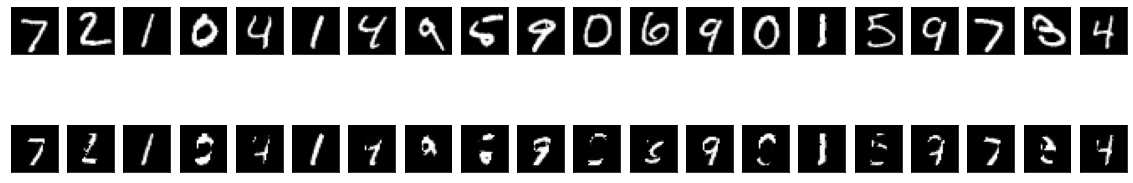

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
decoded_imgs = autoencoder.predict(x_test)
n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

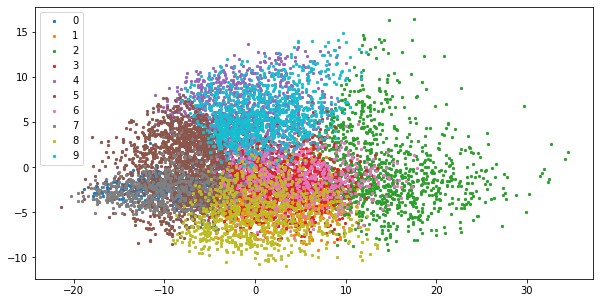

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


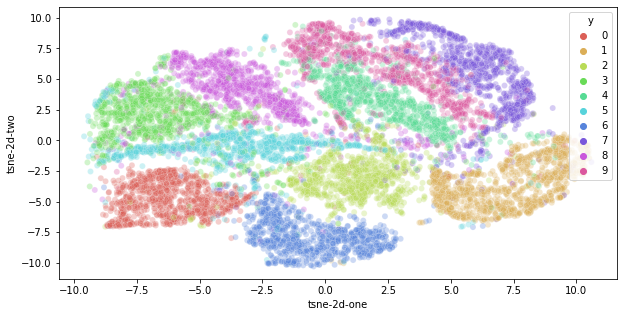

In [ ]:
pca = PCA(n_components=2)

x_train_encoded = encoder.predict(x_train, batch_size=256)
x_test_encoded = encoder.predict(x_test, batch_size=256)
kmeans = KMeans(n_clusters=10, random_state=42).fit(x_train_encoded)
y_pred = kmeans.predict(x_test_encoded)

principalComponents = pca.fit_transform(x_test_encoded)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['label'] = y_pred

plt.figure(figsize=(10, 5))
for i in range(10):
  tmp = principalDf[principalDf['label'] == i]
  plt.scatter(tmp['principal component 1'], tmp['principal component 2'], label = i, s = 5)
plt.legend()
plt.show()

df = pd.DataFrame(x_test_encoded)
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)

dt_sub = pd.DataFrame(zip(tsne_results[:,0], tsne_results[:,1], y_test), 
                      columns=["tsne-2d-one", "tsne-2d-two", "y"]) 
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=dt_sub,
    legend="full",
    alpha=0.3
)